In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

trad_stats = pd.read_excel('nbadata2950.xlsx', sheet_name='outregtrad')
adv_stats = pd.read_excel('nbadata2950.xlsx', sheet_name='outregadv')

In [2]:
trad_stats = trad_stats.drop([13])

In [3]:
trad_stats = trad_stats.drop(trad_stats.index[17:29])

In [4]:
adv_stats = adv_stats.drop([0])
adv_stats = adv_stats.drop([13])
adv_stats = adv_stats.drop(adv_stats.index[17:29])

In [5]:
trad_stats = pd.merge(trad_stats,adv_stats, how = 'inner', on = 'TEAM')

In [6]:
trad_stats = trad_stats.drop(columns=['GP_y','W_y','L_y'])
trad_stats = trad_stats.rename(columns={'Unnamed: 0_x': 'RANK','GP_x': 'GP','W_x' :'W','L_x':'L','MIN_x': 'MPG', 'MIN_y' :'TMIN'})
stats = trad_stats
stats

,RANK,TEAM,GP,W,L,WIN%,MPG,PTS,FGM,FGA,...,AST/TO,AST RATIO,OREB%,DREB%,REB%,TOV%,EFG%,TS%,PACE,PIE
0,2,Los Angeles Lakers,63,49,14,0.778,48.2,114.3,42.9,88.6,...,1.71,18.3,28.4,73.4,51.4,14.9,54.8,57.7,101.11,54.9
1,3,Toronto Raptors,64,46,18,0.719,48.3,113.0,40.6,88.5,...,1.76,18.2,25.9,71.5,49.4,14.2,53.6,57.4,100.87,53.1
2,4,LA Clippers,64,44,20,0.688,48.2,116.2,41.6,89.7,...,1.61,16.9,28.4,73.4,51.5,14.4,53.2,57.4,102.39,53.1
3,5,Boston Celtics,64,43,21,0.672,48.4,113.0,41.2,89.6,...,1.67,16.6,28.4,73.2,50.9,13.6,52.9,56.7,99.78,53.1
4,5,Denver Nuggets,65,43,22,0.662,48.5,110.4,41.8,88.9,...,1.94,19.0,29.4,72.8,51.0,13.9,53.2,56.4,97.66,52.0
5,7,Miami Heat,65,41,24,0.631,48.7,112.2,39.6,84.4,...,1.74,18.8,25.9,75.6,51.6,14.9,54.9,58.7,98.46,52.6
6,7,Utah Jazz,64,41,23,0.641,48.1,111.0,40.1,84.6,...,1.49,16.7,25.8,74.7,51.2,15.0,55.2,58.7,98.95,51.8
7,9,Dallas Mavericks,67,40,27,0.597,48.3,116.4,41.6,90.0,...,1.91,17.6,27.5,73.8,51.0,12.7,54.8,58.1,99.78,52.6
8,9,Houston Rockets,64,40,24,0.625,48.2,118.1,41.1,90.7,...,1.46,15.5,26.1,71.4,48.7,14.1,53.9,57.8,103.62,49.7
9,9,Oklahoma City Thunder,64,40,24,0.625,48.3,110.8,40.3,85.1,...,1.63,16.5,23.9,72.8,49.2,13.5,53.4,57.7,99.21,52.5


In [7]:
pts_mean = (stats['PTS'].mean())
print('The average points per game is: {:.2f}'.format(pts_mean))

fieldgoal_p = (stats['FG%'].mean())
print('The average field goal percentage is: {:.2f}'.format(fieldgoal_p))

threepoint_p = (stats['3P%'].mean())
print('The average three point field percentage is: {:.2f}'.format(threepoint_p))


The average points per game is: 112.58
The average field goal percentage is: 46.39
The average three point field percentage is: 36.26


In [8]:
def label_point_orig(x, y, val, ax):
    a = pd.concat({'x': x,'y': y,'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

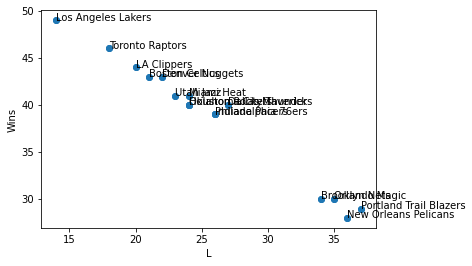

In [9]:
plt.scatter(stats['L'],stats['W'])
plt.xlabel('Losses')
plt.ylabel('Wins')
dax = stats.set_index('L')['W'].plot(style='o')
label_point_orig(stats['L'], stats['W'], stats['TEAM'], dax)

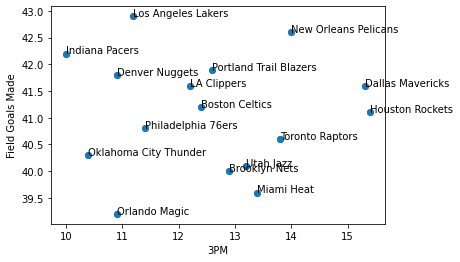

In [10]:
plt.scatter(stats['3PM'],stats['FGM'])
plt.xlabel('3 Pointers Made')
plt.ylabel('Field Goals Made')
dax = stats.set_index('3PM')['FGM'].plot(style='o')
label_point_orig(stats['3PM'], stats['FGM'], stats['TEAM'], dax)

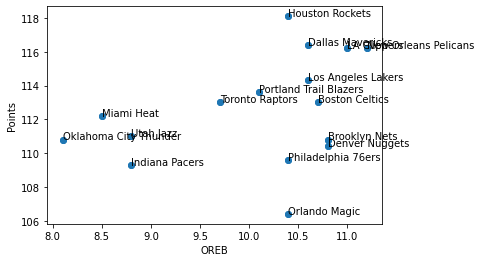

In [11]:
plt.scatter(stats['OREB'],stats['PTS'])
plt.xlabel('Offensive Rebounds')
plt.ylabel('Points')
dax = stats.set_index('OREB')['PTS'].plot(style='o')
label_point_orig(stats['OREB'], stats['PTS'], stats['TEAM'], dax)

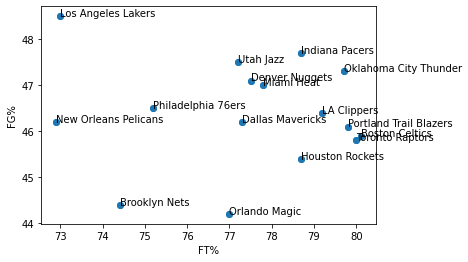

In [14]:
plt.scatter(stats['FT%'],stats['FG%'])
plt.xlabel('FT%')
plt.ylabel('FG%')
dax = stats.set_index('FT%')['FG%'].plot(style='o')
label_point_orig(stats['FT%'], stats['FG%'], stats['TEAM'], dax)

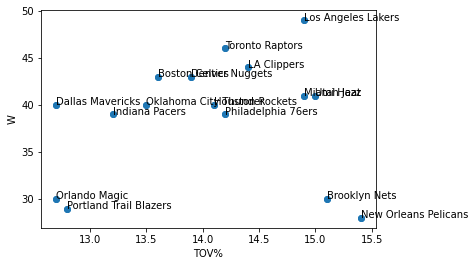

In [18]:
plt.scatter(stats['TOV%'],stats['W'])
plt.xlabel('TOV%')
plt.ylabel('W')
dax = stats.set_index('TOV%')['W'].plot(style='o')
label_point_orig(stats['TOV%'], stats['W'], stats['TEAM'], dax)